# Hotel Discount Optimization Challenge

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading 
df=pd.read_csv("hotels_data.csv")
df.head(3)

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5


In [3]:
df.shape

(187848, 10)

# Data Cleaning 

In [4]:
# converting date columns(String) in date time format 
df['Snapshot Date']=pd.to_datetime(df['Snapshot Date'],errors='coerce')
df['Checkin Date']=pd.to_datetime(df['Checkin Date'],errors='coerce')

In [5]:
df['Snapshot month'] =df['Snapshot Date'].dt.month_name()
df['Snapshot year'] = df['Snapshot Date'].dt.year
df['Checkin month']= df['Checkin Date'].dt.month_name()
df['Checkin year'] = df['Checkin Date'].dt.year

In [6]:
df['Snapshot Date']

0        2015-07-17
1        2015-07-17
2        2015-07-17
3        2015-07-17
4        2015-07-17
            ...    
187843   2015-08-15
187844   2015-08-15
187845   2015-08-15
187846   2015-08-15
187847   2015-08-15
Name: Snapshot Date, Length: 187848, dtype: datetime64[ns]

In [7]:
df.columns

Index(['Snapshot ID', 'Snapshot Date', 'Checkin Date', 'Days',
       'Original Price', 'Discount Price', 'Discount Code', 'Available Rooms',
       'Hotel Name', 'Hotel Stars', 'Snapshot month', 'Snapshot year',
       'Checkin month', 'Checkin year'],
      dtype='object')

In [8]:
df.describe()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,Snapshot year,Checkin year
count,187848.000000,187848,187848,187848.0,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,351.643451,2015-10-04 23:32:16.374089728,2015-10-22 10:42:51.559984896,5.0,1825.742143,1673.172283,2.434186,14.588561,3.905823,2015.004967,2015.076168
min,1.000000,2015-07-17 00:00:00,2015-07-18 00:00:00,5.0,289.000000,260.000000,1.000000,-1.000000,0.000000,2015.000000,2015.000000
25%,150.000000,2015-08-25 00:00:00,2015-09-11 00:00:00,5.0,1160.000000,1035.000000,2.000000,-1.000000,3.000000,2015.000000,2015.000000
50%,439.000000,2015-10-06 00:00:00,2015-10-24 00:00:00,5.0,1599.000000,1475.000000,2.000000,-1.000000,4.000000,2015.000000,2015.000000
75%,506.000000,2015-11-09 00:00:00,2015-11-26 00:00:00,5.0,2160.000000,1963.250000,3.000000,8.000000,4.000000,2015.000000,2015.000000
max,417419.000000,2016-01-01 00:00:00,2016-02-04 00:00:00,5.0,29975.000000,28675.000000,4.000000,431.000000,5.000000,2016.000000,2016.000000
std,1007.348927,NaN,NaN,0.0,1042.355712,983.618013,1.005191,41.575482,0.846496,0.070300,0.265267


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187848 entries, 0 to 187847
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Snapshot ID      187848 non-null  int64         
 1   Snapshot Date    187848 non-null  datetime64[ns]
 2   Checkin Date     187848 non-null  datetime64[ns]
 3   Days             187848 non-null  int64         
 4   Original Price   187848 non-null  int64         
 5   Discount Price   187848 non-null  int64         
 6   Discount Code    187848 non-null  int64         
 7   Available Rooms  187848 non-null  int64         
 8   Hotel Name       187848 non-null  object        
 9   Hotel Stars      187848 non-null  int64         
 10  Snapshot month   187848 non-null  object        
 11  Snapshot year    187848 non-null  int32         
 12  Checkin month    187848 non-null  object        
 13  Checkin year     187848 non-null  int32         
dtypes: datetime64[ns](2)

In [10]:
# finding the discounts given 
df['discounts percentage'] = (df['Original Price']-df['Discount Price'])/df['Original Price']*100
df['discounts percentage']

0         11.714771
1         11.769991
2          2.974828
3          4.140311
4          3.852789
            ...    
187843     3.007519
187844    11.401425
187845     4.052198
187846     3.343109
187847     8.021108
Name: discounts percentage, Length: 187848, dtype: float64

In [11]:
df.duplicated().sum()

19

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# finding null values 
df.isnull().sum()

Snapshot ID             0
Snapshot Date           0
Checkin Date            0
Days                    0
Original Price          0
Discount Price          0
Discount Code           0
Available Rooms         0
Hotel Name              0
Hotel Stars             0
Snapshot month          0
Snapshot year           0
Checkin month           0
Checkin year            0
discounts percentage    0
dtype: int64

# EDA

In [14]:
# df.dropna(inplace=True)

In [15]:
df=df.sort_values(by=['Hotel Name', 'Checkin Date', 'Snapshot Date'])
df['Bookings'] = df.groupby(['Hotel Name', 'Checkin Date'])['Available Rooms'].diff().mul(-1)
df['Bookings'] = df['Bookings'].apply(lambda x: max(x,0))

In [16]:
df.dropna(inplace=True)
# converting to int
df['Bookings'] = df['Bookings'].astype(int)

In [17]:
# Booking* Discount Price
df['Revenue'] = df['Bookings']* df['Discount Price']

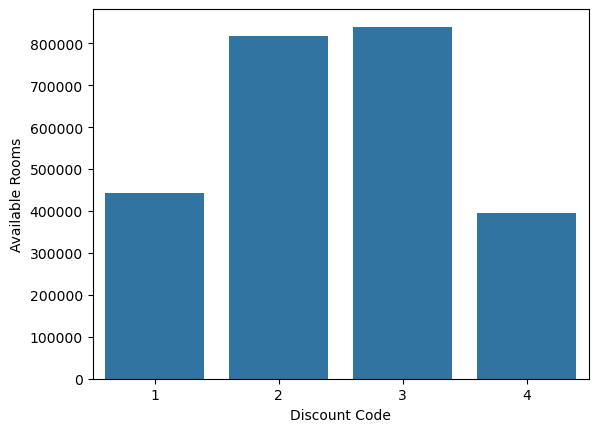

In [18]:
# Analyze which discount does result in the largest booking potential(reduction in available rooms)
gd=df.groupby(['Discount Code']).agg({'Available Rooms':'sum'}).sort_values('Available Rooms', ascending=False).reset_index()
sns.barplot(x='Discount Code', y='Available Rooms', data=gd)
plt.show()

# Conclusion

This bar chart shows the total available rooms grouped by discount codes. Some discount codes clearly correspond to a larger number of rooms, indicating they are more widely applied or offered more frequently. The variation suggests that certain discount levels may be strategically important in attracting availability. Hotels can leverage this by focusing on discount codes associated with higher room availability.

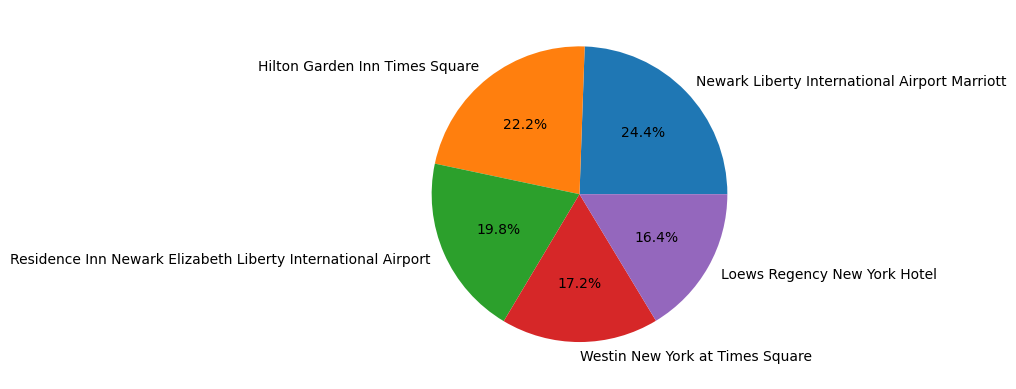

In [19]:
gd = df.groupby(['Hotel Name']).agg({'Snapshot ID':'count'}).sort_values('Snapshot ID', ascending=False).rename(columns={'Snapshot ID': 'total booking'}).reset_index().head()
plt.pie(gd['total booking'], labels=gd['Hotel Name'], autopct ='%0.1f%%')
plt.show()

# Conclusion 

This pie chart illustrates the share of total bookings across different hotels. A few hotels dominate the bookings, while others account for smaller shares. This concentration indicates that top-performing hotels capture the majority of demand. Such insights can guide marketing or resource allocation strategies towards high-demand hotels.

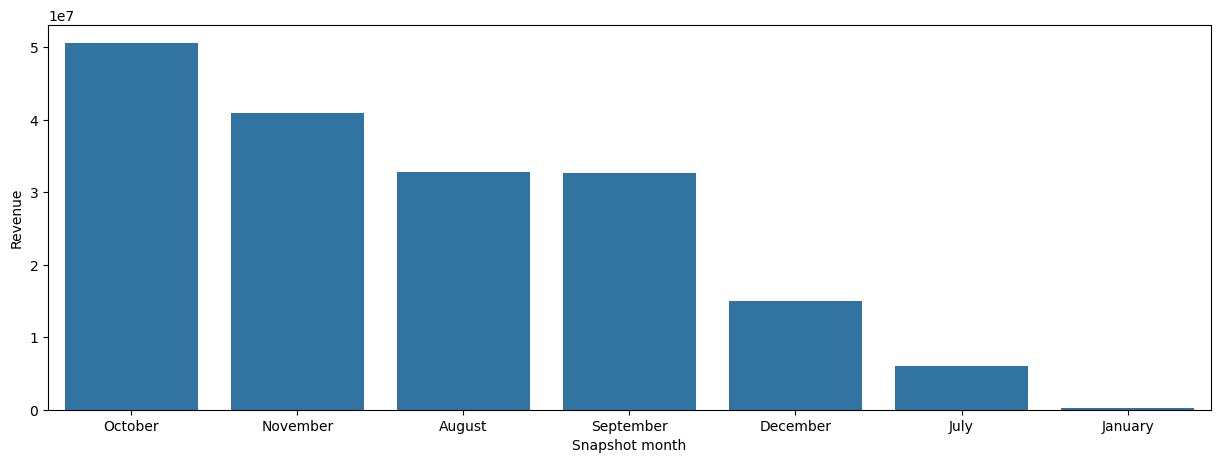

In [20]:
gd = df.groupby(['Snapshot month']).agg({'Revenue':'sum'}).sort_values('Revenue',ascending=False).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='Snapshot month', y='Revenue', data=gd)
plt.show()

# Conclusion

This bar plot highlights revenue distribution by snapshot month. Peaks in revenue point to high-demand months, likely influenced by seasonality or promotional campaigns. Identifying these trends helps in planning discount strategies during low-demand months to smooth revenue performance.

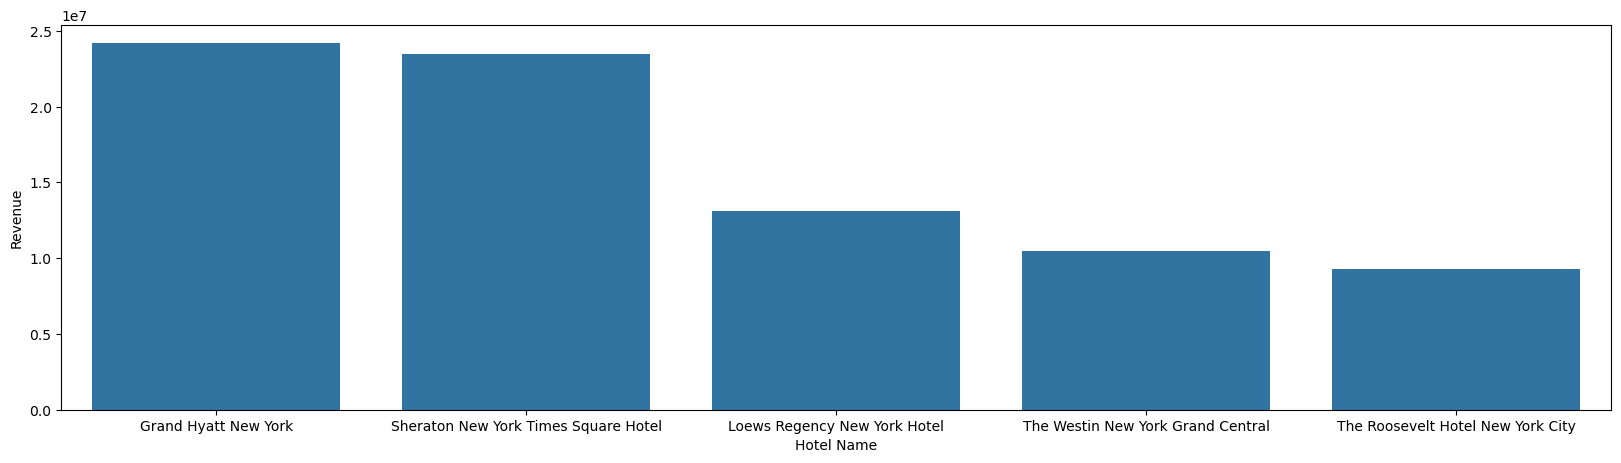

In [21]:
gd = df.groupby(['Hotel Name']).agg({'Revenue':'sum'}).sort_values('Revenue', ascending =False).reset_index().head()
plt.figure(figsize=(20,5))
sns.barplot(x='Hotel Name', y='Revenue', data=gd)
plt.show()


# Conclusion 

This chart shows revenue contribution by hotel. The highest revenue is generated by a small subset of hotels, suggesting uneven performance across the portfolio. Managers could study the practices of top revenue generators and replicate successful strategies in lower-performing hotels.

<Axes: xlabel='discounts percentage', ylabel='Available Rooms'>

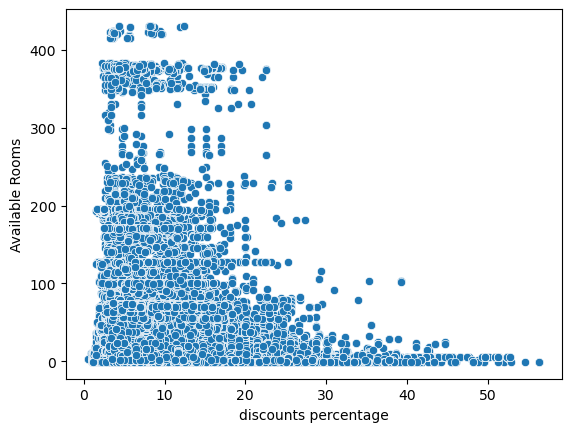

In [22]:
plt.show()
sns.scatterplot(x ='discounts percentage', y='Available Rooms', data=df)

# Conclusion 

This scatter plot compares discount percentage against available rooms. The trend suggests whether higher discounts lead to more availability being consumed or retained. Any clustering or correlation here helps assess how sensitive availability is to discount levels.

<Axes: xlabel='discounts percentage', ylabel='Revenue'>

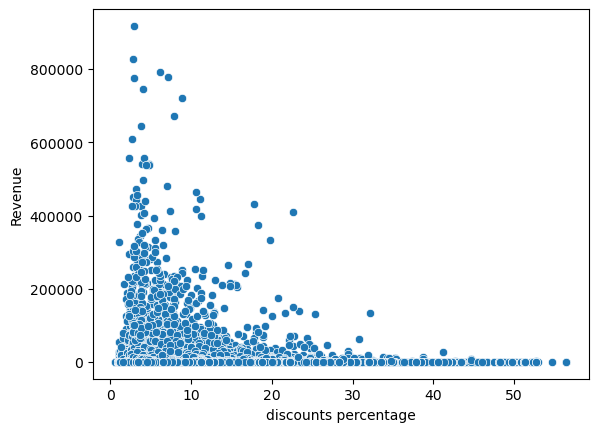

In [23]:
plt.show()
sns.scatterplot(x='discounts percentage', y='Revenue', data=df)

# Conclusion

This scatter plot shows the relationship between discount percentage and revenue. By observing the spread, one can determine whether deeper discounts are effectively driving revenue growth or eroding it. This analysis informs the optimal balance between discount depth and profitability.

<Axes: xlabel='discounts percentage'>

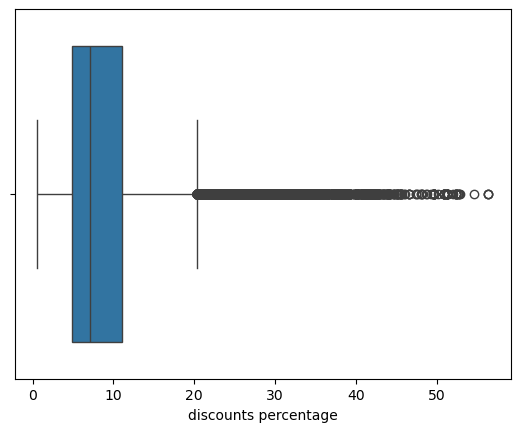

In [24]:
sns.boxplot(x='discounts percentage', data=df)

# Conclusion

This boxplot depicts the distribution of discount percentages. The spread and presence of outliers indicate variability in discount strategies. A wide range implies flexible pricing, while concentrated values suggest more standardized discounting policies.

In [25]:
upper_limit = df['discounts percentage'].quantile(0.99)
lower_limit = df['discounts percentage'].quantile(0.01)
df['discounts percentage'] = np.where(df['discounts percentage']> upper_limit,
upper_limit, np.where(df['discounts percentage']< lower_limit,lower_limit,df['discounts percentage']))

<Axes: xlabel='discounts percentage'>

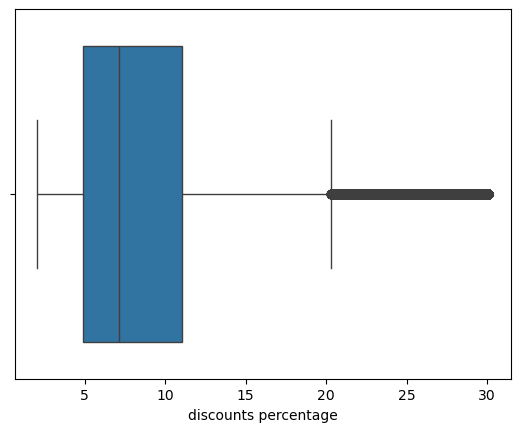

In [26]:
sns.boxplot(x='discounts percentage', data=df)

# Conclusion

This boxplot again examines discount percentages, likely for a filtered subset. The distribution helps verify consistency across different conditions or data segments. Outliers may highlight unusual discounting that warrants review.

<Axes: xlabel='Available Rooms'>

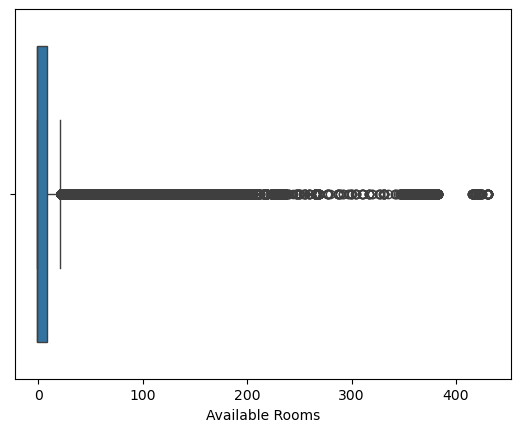

In [27]:
sns.boxplot(x='Available Rooms', data=df)

# Conclusion 

This boxplot presents the distribution of available rooms. The variation reflects capacity differences among hotels or time periods. Identifying outliers may help flag unusual situations, such as sudden spikes in availability due to cancellations or under-booking.

# Price Elasticity Modeling

Build models to estimate the relationship between discount percentage and available rooms.

Identify “sweet spots” where discounts maximize bookings without unnecessary revenue loss.

In [28]:
x=df[['discounts percentage']]
y=df['Available Rooms']

In [29]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=5)
x=pf.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [32]:
model.score(x_train,y_train)

0.02478879690170288

In [33]:
model.score(x_test,y_test)

0.02081829309463501

In [34]:
!pip install  --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [35]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
y_pred =model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print("R2 score:",r2_score(y_test,y_pred))
print("RMSE:",rmse)

R2 score: 0.02081829309463501
RMSE: 42.29744498830943


# Hotel Segmentation

Cluster hotels based on price levels, discount strategies, and star ratings. Identify segments like “Luxury Hotels that rarely discount” vs. “Mid-range hotels that aggressively discount.”

In [36]:
hotel_df = df.groupby('Hotel Name').agg({'Original Price':'mean','Discount Price':'mean','discounts percentage':'mean','Hotel Stars':'first'}).reset_index()
hotel_df

,Hotel Name,Original Price,Discount Price,discounts percentage,Hotel Stars
0,1 Hotel Central Park,2203.272727,2118.626263,3.871807,5
1,36 Hudson Hotel,803.500000,726.500000,9.559129,3
2,6 Columbus - a SIXTY Hotel,1485.816327,1377.255102,7.274700,5
3,70 Park Avenue Hotel a Kimpton Hotel,1929.909091,1738.227273,10.211431,4
4,Ace Hotel New York,1830.000000,1642.500000,10.558987,4
...,...,...,...,...,...
517,YOTEL New York at Times Square,1516.818182,1384.090909,8.463955,4
518,Z NYC Hotel,1120.000000,1066.000000,4.940432,4
519,citizenM New York Times Square,1802.200000,1716.000000,4.651857,4
520,ink48 hotel a Kimpton Hotel,1643.674419,1471.939535,10.673603,4


<Axes: xlabel='Original Price', ylabel='Density'>

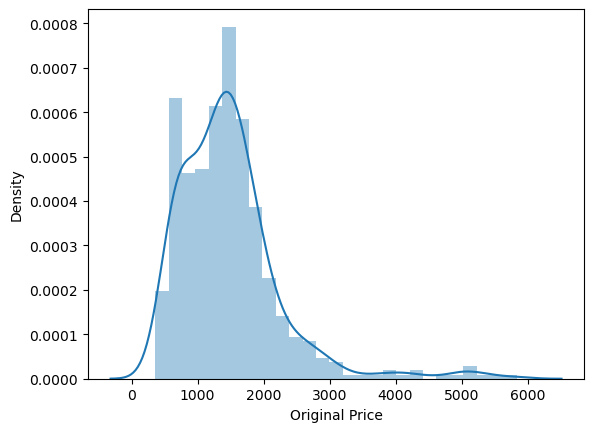

In [37]:
sns.distplot(hotel_df['Original Price'])

# Conclusion

This distribution plot shows the frequency of original room prices. It provides a detailed view of how prices are spread across the dataset. Understanding the shape of this distribution helps in setting discount strategies and identifying common pricing tiers.

<Axes: xlabel='Discount Price', ylabel='Density'>

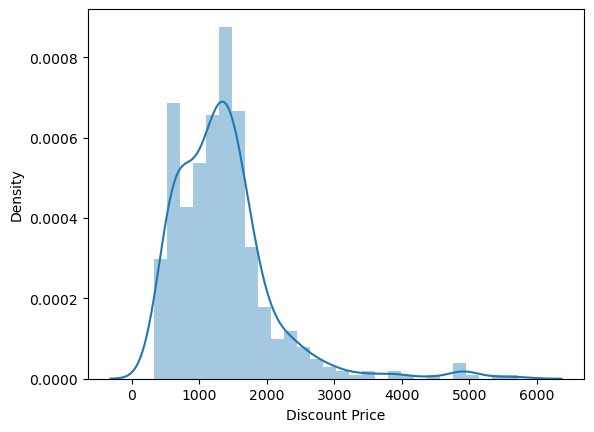

In [38]:
sns.distplot(hotel_df['Discount Price'])

In [39]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            522 non-null    object 
 1   Original Price        522 non-null    float64
 2   Discount Price        522 non-null    float64
 3   discounts percentage  522 non-null    float64
 4   Hotel Stars           522 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 20.5+ KB


In [40]:
from sklearn.preprocessing import FunctionTransformer
trf=FunctionTransformer(func=np.log1p)
hotel_df['Original Price']=trf.fit_transform(hotel_df['Original Price'])
hotel_df['Discount Price']=trf.fit_transform(hotel_df['Discount Price'])

<Axes: xlabel='Original Price', ylabel='Density'>

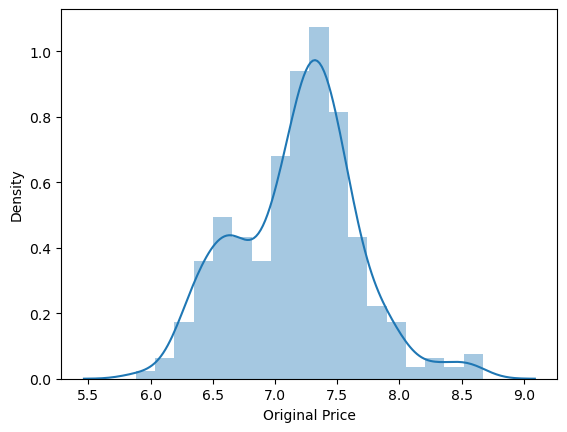

In [41]:
sns.distplot(hotel_df['Original Price'])

# Conclusion

This repeated distribution plot of original prices may reflect a filtered or cleaned dataset. Any changes in shape compared to earlier plots highlight the impact of data processing or segmentation on price analysis.

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()
x_scaled=ss.fit_transform(hotel_df.drop(columns = 'Hotel Name'))

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


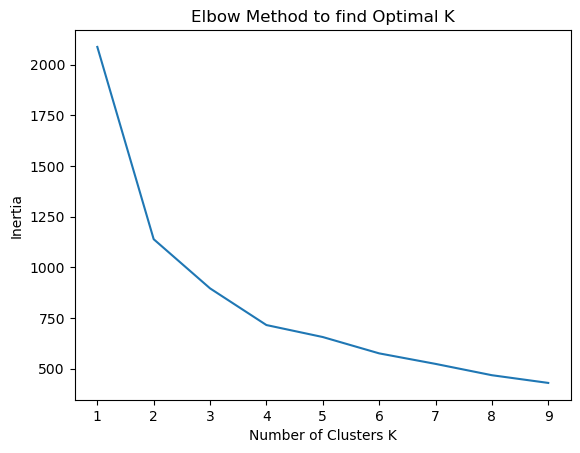

In [44]:
inertia = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(x_scaled)
    inertia.append(model.inertia_)
plt.plot(K, inertia)
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method to find Optimal K')
plt.show()

# Conclusion

The elbow method plot shows inertia values across different cluster counts (K). The point where inertia reduction slows down indicates the optimal number of clusters, balancing simplicity with accuracy. This is crucial for effective hotel segmentation.

Silhouette Scores from K=2 to 10: [0.41285705890451785, 0.34195965597896866, 0.3643806625214063, 0.36213619681770765, 0.3050088257373643, 0.3144790742765364, 0.3049734340934782, 0.294634266980534]


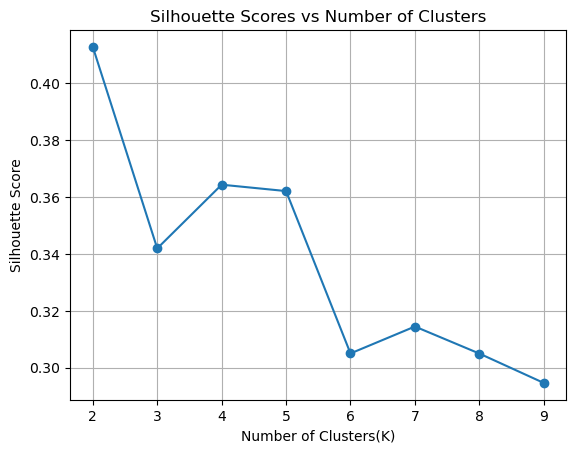

In [45]:
from sklearn.metrics import silhouette_score
score=[]
# K must be >=2 for silhouette_score to work
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score.append(silhouette_score(x_scaled, labels))

# Print scores 
print("Silhouette Scores from K=2 to 10:",score)

#Optional: Plot silhoutte score to find optimal K
plt.plot(range(2,10),score,marker='o')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Conclusion

The silhouette score plot evaluates clustering quality across different K values. A higher silhouette score reflects better-defined clusters. Combining this with the elbow method supports a robust decision on the optimal number of clusters.

In [46]:
# Apply KMeans with K=4
kmeans = KMeans(n_clusters=4,random_state=42)
hotel_df['Cluster'] = kmeans.fit_predict(x_scaled)

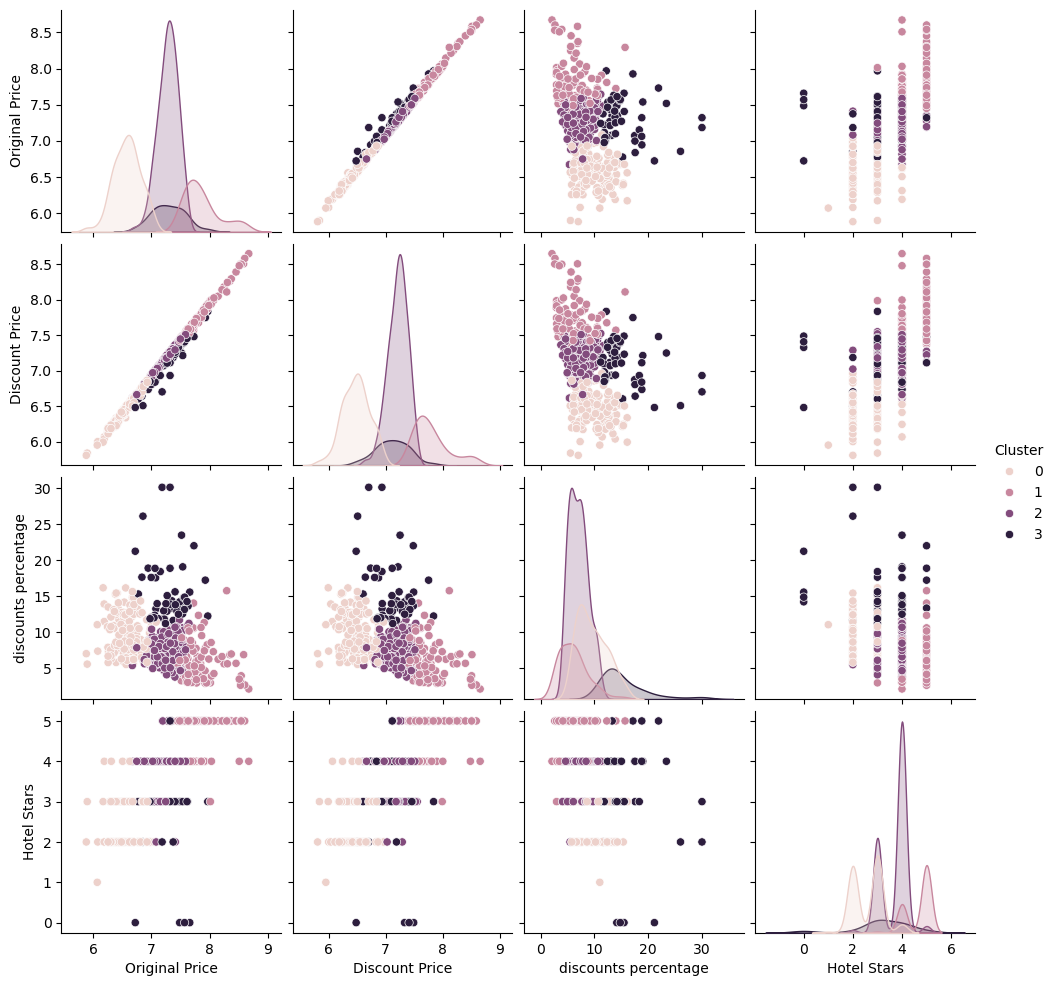

In [47]:
sns.pairplot(hotel_df,hue = 'Cluster')

# Conclusion 

This pairplot visualizes hotel clusters across multiple features. Clear separation between clusters indicates meaningful segmentation, while overlap suggests similarities between groups. Such analysis informs targeted discounting and marketing strategies.

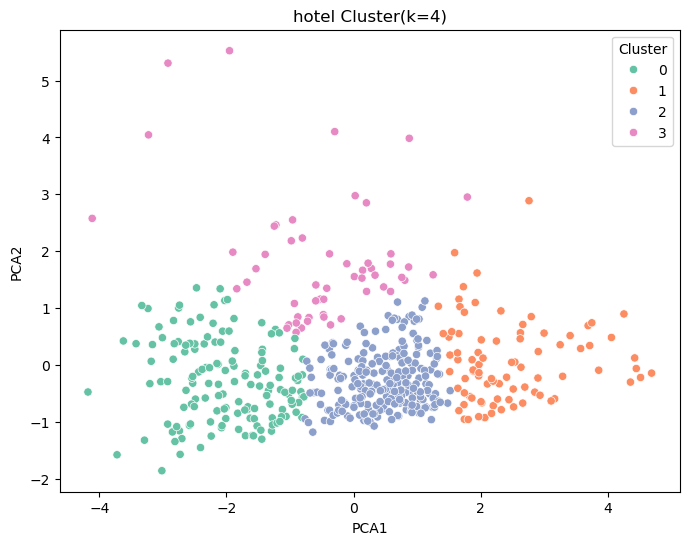

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)
hotel_df["PCA1"]=X_pca[:,0]
hotel_df["PCA2"]=X_pca[:,1]
#----plot Cliusters ----
plt.figure(figsize=(8,6))
sns.scatterplot(data = hotel_df, x="PCA1",y="PCA2",hue="Cluster",palette="Set2")
plt.title(f"hotel Cluster(k=4)")
plt.show()

# Conclusion

The PCA scatter plot reduces features into two dimensions to visualize clusters. Distinct groupings confirm that clustering captures meaningful customer or hotel differences. Overlap would suggest refining features or cluster parameters.

In [49]:
cluster_summary = hotel_df.groupby("Cluster").agg({'Original Price': ['mean', 'min', 'max'],
    'discounts percentage': ['mean', 'min', 'max'],
    'Hotel Stars': ['mean', 'min', 'max'],
    'Hotel Name': 'count'})
print("\nCluster Feature Means:")
display(cluster_summary)


Cluster Feature Means:


Original Price                     discounts percentage             \
                  mean       min       max                 mean        min   
Cluster                                                                      
0             6.578037  5.880533  7.081148             9.590650   5.508475   
1             7.858172  7.449084  8.672424             6.106969   2.105332   
2             7.280036  6.670766  7.644724             7.031132   3.759634   
3             7.291667  6.721827  7.967973            15.400287  11.182796   

                   Hotel Stars         Hotel Name  
               max        mean min max      count  
Cluster                                            
0        16.142558    2.605442   1   4        147  
1        15.738138    4.682353   3   5         85  
2        11.684073    3.703390   2   5        236  
3        30.085653    3.203704   0   5         54

In [50]:
# Identify segments like “Luxury Hotels that rarely discount” vs. “Mid-range hotels that aggressively discount.”

def hot(row):
    if row['Cluster']==0:
        return 'lower category hotels'
    elif row['Cluster']==1:
        return 'Luxury Hotels that rarely discount'
    elif row['Cluster']==2:
        return 'Average hotels with agg discount'
    else:
        return 'Mid-range hotels that aggressively discount'
    
hotel_df['hotel type']=hotel_df.apply(hot,axis=1)

<Axes: xlabel='hotel type', ylabel='count'>

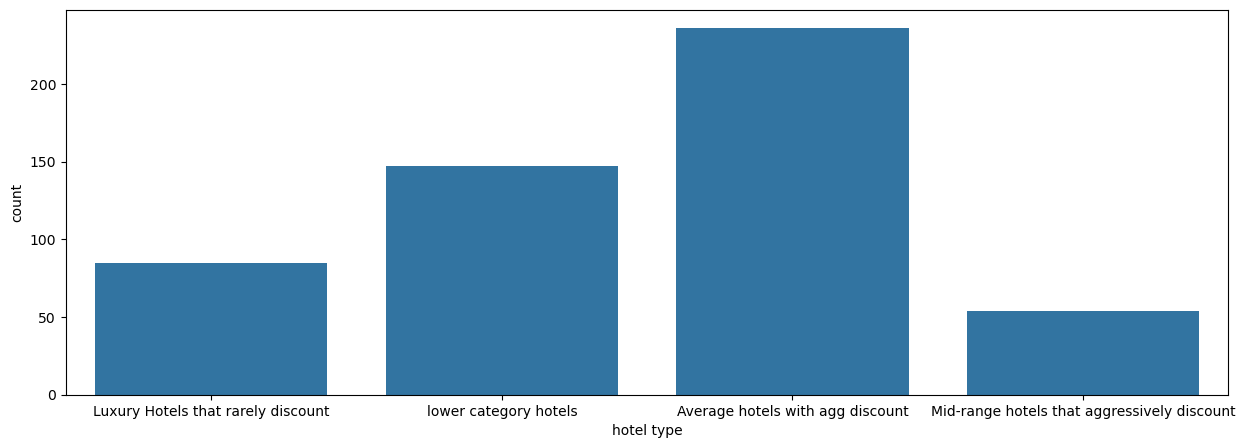

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(x='hotel type',data=hotel_df)

# Conclusion

This count plot shows the distribution of hotels by type. Identifying which hotel types dominate the dataset helps contextualize revenue and discount analysis. Balanced representation ensures fair insights, while imbalances highlight areas requiring tailored strategies.